In [1]:
import torch
import numpy as np

from data import data_preprocess
from evaluation import metrics
from model import concrete_dropout, deep_ensemble

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('mpg')

In [3]:
deep_ensemble_model = deep_ensemble.train_model(x_train, y_train)
concrete_dropout_model = concrete_dropout.train_model(x_train, y_train)

initial loss:  766.0668334960938
final loss:  4.193688869476318
initial loss:  953.5367431640625
final loss:  4.137839317321777
initial loss:  927.85302734375
final loss:  4.198490142822266
initial loss:  832.5824584960938
final loss:  4.19667387008667
initial loss:  801.9974975585938
final loss:  4.079724311828613
final loss:  4.316927433013916


Deep ensemble test MAPE:  0.19656521


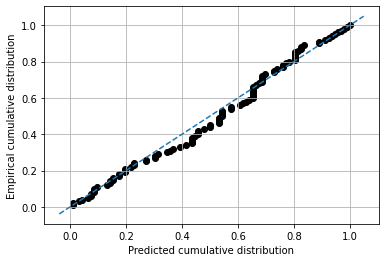

Deep ensemble test calibration error when step size is 0.001:  1.106627599243856
Deep ensemble test calibration error when step size is 0.01:  0.11499527410207934
Deep ensemble test calibration error when step size is 0.1:  0.01089319470699432


In [4]:
mean_pred, var_pred = deep_ensemble_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()

print('Deep ensemble test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Deep ensemble test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Deep ensemble test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Deep ensemble test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

Concrete dropout test MAPE:  0.21765815


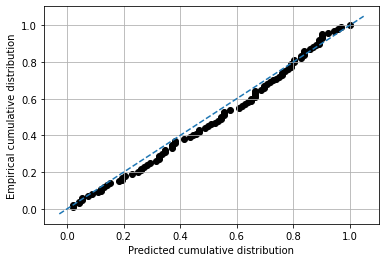

Concrete dropout test calibration error when step size is 0.001:  1.1767778827977309
Concrete dropout test calibration error when step size is 0.01:  0.11683837429111522
Concrete dropout test calibration error when step size is 0.1:  0.0118383742911153


In [5]:
mean_pred, log_var_pred, _ = concrete_dropout_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = np.exp(log_var_pred.detach().numpy())

print('Concrete dropout test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Concrete dropout test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Concrete dropout test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Concrete dropout test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))